In [1]:
import pandas as pd
%run data_prep.ipynb

('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')
('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')


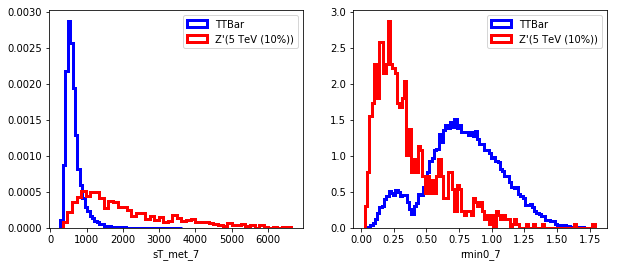

In [2]:
seed = 1234
np.random.seed(seed)

df = {}
#VARS = [ 'sT_met_7', 'rmin0_7', 'rmin1_7']
#BINS = {'sT_met_7':50, 'rmin0_7':100, 'rmin1_7':100}

VARS = [ 'sT_met_7', 'rmin0_7']
BINS = {'sT_met_7':50, 'rmin0_7':100}

for k in filename.keys():
    df[k] = pd.DataFrame(params[k],columns=VARS)
    df[k] = pd.DataFrame(params[k],columns=VARS)
    df[k] = df[k][df[k]['sT_met_7'] >=0]

df[('bkg','mm')]['label'] = np.zeros(len(df[('bkg','mm')]))
df[('sig','mm')]['label'] = np.ones(len(df[('sig','mm')]))

    
#print(sorted(df.keys()))    
#print (df[('sig','mm')].iloc[-10:])
#print (df[('bkg','mm')].iloc[-10:])
fig, ax = plt.subplots(3, 3, figsize=(10,4))
fig.delaxes(ax[2,2])

for i in range(len(VARS)):
    ax = plt.subplot(1, 2, (i%3)+1)
    sns.distplot(df[('bkg','mm')][:][VARS[i]], norm_hist=True, kde=False,
             label="TTBar", bins = BINS[VARS[i]],
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "blue"})
    sns.distplot(df[('sig','mm')][:][VARS[i]], norm_hist=True, kde=False,
             label="Z'(5 TeV (10%))", bins = BINS[VARS[i]],
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "red"})
    ax.legend(loc="upper right")

plt.show()    


In [18]:
## DNN architecture 


Using TensorFlow backend.


2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


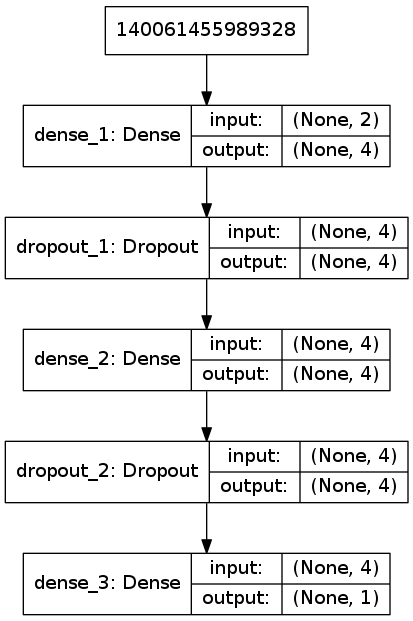

In [3]:
# baseline keras model
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from IPython.display import Image


NDIM = len(VARS)
print(NDIM)
model = Sequential()
# Number of parameters: for Dense layer: each neuron has one bias parameter and one weight per input: 
# N = n_neurons * ( n_inputs + 1).
# Input - Layer
model.add(Dense(NDIM*2, activation = "relu", input_shape=(NDIM, )))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(NDIM*2, activation = "relu"))
model.add(Dropout(0.2, noise_shape=None, seed=None)) 
model.add(Dense(1, activation = "sigmoid"))


# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_plot.png')

In [4]:
from sklearn.model_selection import train_test_split

df_sampled_bkg = df[('bkg','mm')].sample(n=df[('sig','mm')].shape[0], random_state=1)
df_all = pd.DataFrame([])
df_all = pd.concat([df[('sig','mm')],df_sampled_bkg])
print df[('sig','mm')].shape
print df_sampled_bkg.shape
print df_all.shape

(951, 3)
(951, 3)
(1902, 3)


In [5]:
#X = df_all.iloc[:,0:len(VARS)] #Predictors
#Y = df_all.iloc[:,len(VARS)]   #Outcomes

X = df_all[VARS] #Predictors
Y = df_all[['label']]#Outcomes

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print type(X_test)
print type(X)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0]/float(X_train.shape[0]+X_test.shape[0]))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1521, 2)
(381, 2)
0.799684542587


sT_met_7    1404.503631
rmin0_7        0.544040
dtype: float64
sT_met_7    1329.030186
rmin0_7        0.580867
dtype: float64
sT_met_7    1344.148684
rmin0_7        0.573490
dtype: float64


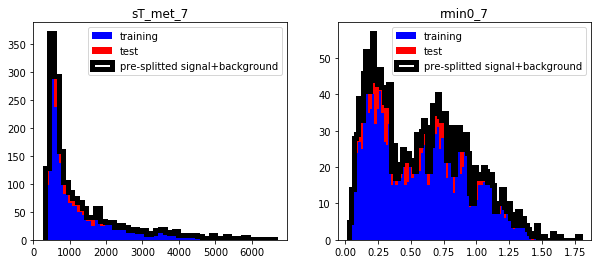

In [6]:
print X_test.mean(axis=0) 
print X_train.mean(axis=0) 
print X.mean(axis=0) 
sample = {'training': 'blue', 'test': 'red'}
fig, ax = plt.subplots(3, 3, figsize=(10,4))
fig.delaxes(ax[2,2])

for i in range(len(VARS)):
    ax = plt.subplot(1, 2, (i%3)+1)
    bins=np.histogram(np.hstack((X_test[VARS[i]],X_train[VARS[i]])), 
                      bins = BINS[VARS[i]])[1]
    plt.hist([X_train[VARS[i]], X_test[VARS[i]]], bins, stacked=True,
    color = [sample['training'], sample['test']], label=['training', 'test'])
    plt.hist(X[VARS[i]], bins, histtype='step',edgecolor='black', linewidth=5,
             facecolor='none',label='pre-splitted signal+background')
    ax.legend(loc="upper right")
    plt.title(VARS[i])

plt.show()  

[1.32903019e+03 5.80867158e-01]
[5.02191611e-17 9.57667724e-17]
[ 0.0663485  -0.10494622]
[ 0.01329063 -0.02102235]
(1521, 2)


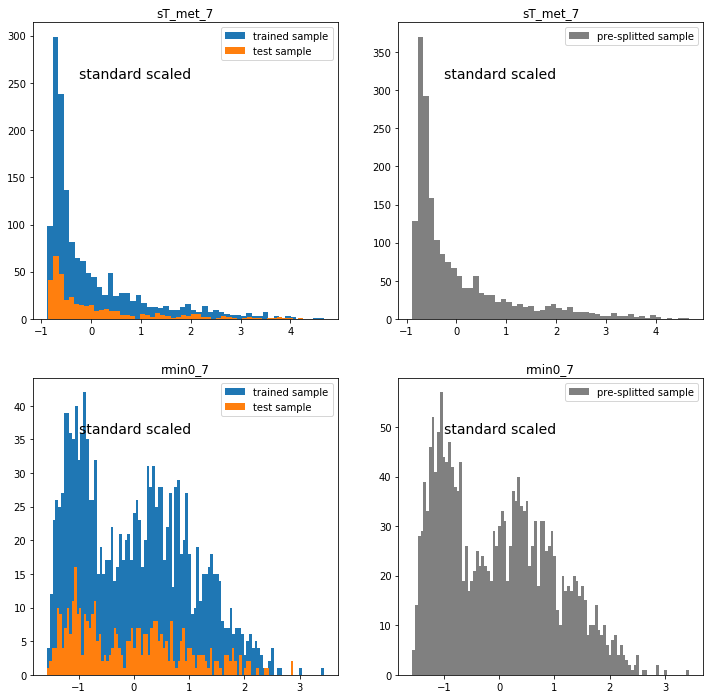

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import dump, load
from sklearn.externals import joblib

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(scaler.mean_)

scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

scaler_total = joblib.load(scaler_filename) 
X = scaler_total.transform(X)

print X_train.mean(axis=0) 
print X_test.mean(axis=0) 
print X.mean(axis=0) 

fig, ax = plt.subplots(2, 2, figsize=(12,12))
print X_train.shape


for i in range(len(VARS)):
    ax = plt.subplot(2, 2, 2*(i%3)+1)
    plt.hist(X_train[:,i], bins=BINS[VARS[i]], label='trained sample')
    plt.hist(X_test[:,i], bins=BINS[VARS[i]],label='test sample')
    plt.title(VARS[i])
    ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
            verticalalignment='top')
    ax.legend(loc="upper right")

    ax = plt.subplot(2, 2, 2*(i%3)+2)
    plt.hist(X[:,i], bins=BINS[VARS[i]],color='grey',label='pre-splitted sample')
    ax.legend(loc="upper right")
    plt.title(VARS[i])
    ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
            verticalalignment='top')


plt.show()  


In [8]:

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('dense_model.h5', monitor='val_loss', 
                                   verbose=0, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)

In [9]:
# Train classifier
history = model.fit(X_train, 
                    Y_train, 
                    epochs=200, 
                    batch_size=1024, 
                    verbose=0, # switch to 1 for more verbosity 
                    callbacks=[early_stopping, model_checkpoint], 
                    validation_split=0.25)

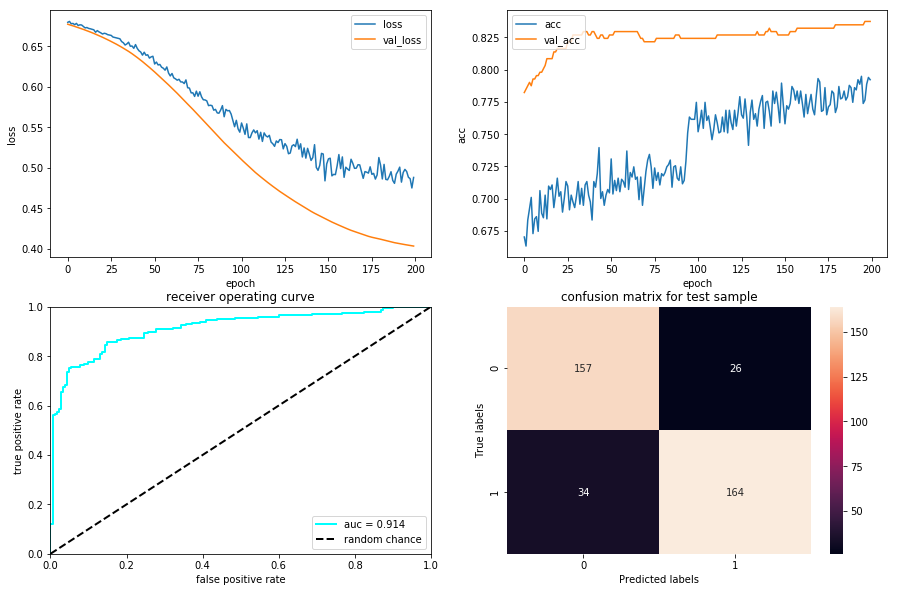

[[157  26]
 [ 34 164]]


'\n# Example of a confusion matrix in Python\nfrom sklearn.metrics import confusion_matrix\n \nexpected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]\npredicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]\nresults = confusion_matrix(expected, predicted)\nprint(results)\n\n[[4 2]\n[1 3]]\n'

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15,10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')


# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history['acc'], label='acc')
ax.plot(history.history['val_acc'], label='val_acc')
ax.legend(loc="upper left")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve')
ax.legend(loc="lower right")

matrix = confusion_matrix(Y_test, Y_predict.round())

ax = plt.subplot(2, 2, 4)
sns.heatmap(matrix, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix for test sample'); 
plt.show()
print matrix


'''
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
 
expected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
results = confusion_matrix(expected, predicted)
print(results)

[[4 2]
[1 3]]
'''

# evaluate the model
#model.evaluate(X_test, Y_test, verbose=0)



In [42]:
df_all['dense'] = model.predict(X) # add prediction to array
df_all['predicted_outcome'] = np.zeros(len(df_all))
plt.figure(figsize=(16, 6))
print type(Y_predict)


#print df_all.iloc[:50]
#print df_all.iloc[-50:]


for i, row in df_all.iterrows():
    if row['dense']<0.5:
        df_all.set_value(i,'predicted_outcome',0)
    else:
        df_all.set_value(i,'predicted_outcome',1)
        
#print df_all.iloc[:10]
#print df_all.iloc[-10:]




<type 'numpy.ndarray'>


/usr/local/bin/start_ipykernel.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/bin/start_ipykernel.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


<Figure size 1152x432 with 0 Axes>

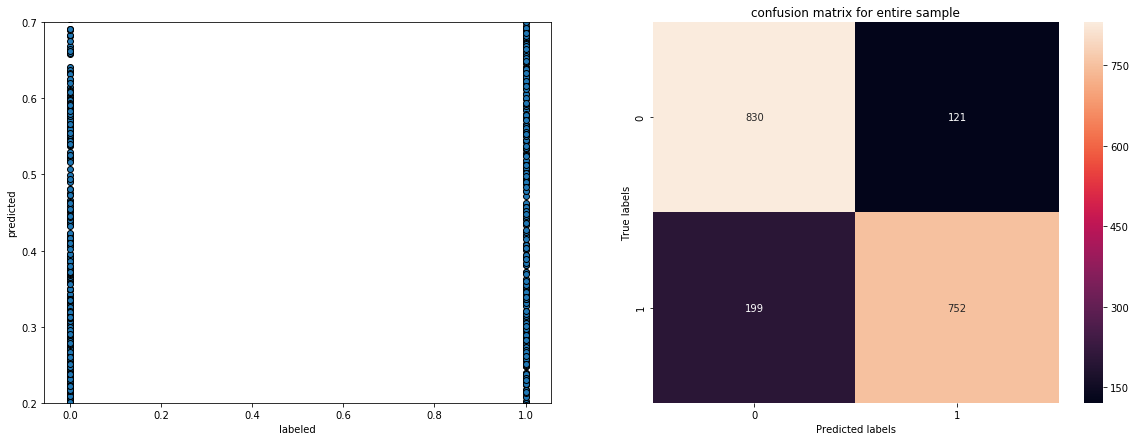

[[157  26]
 [ 34 164]]


In [12]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,7))
ax = plt.subplot(1, 2, 1)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax.scatter(df_all['label'],df_all['dense'],  cmap=cm_bright, edgecolors='k')
ax.set_xlabel('labeled')
ax.set_ylabel('predicted')
ax.set_ylim(0.2,0.7)


all_matrix = confusion_matrix(df_all['label'], df_all['dense'].round())
ax = plt.subplot(1, 2, 2)
sns.heatmap(all_matrix, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix for entire sample'); 
plt.show()
print matrix

1


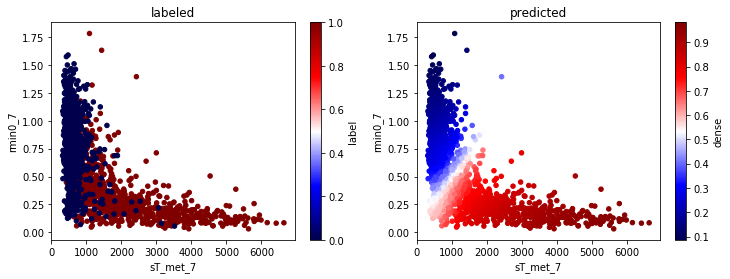

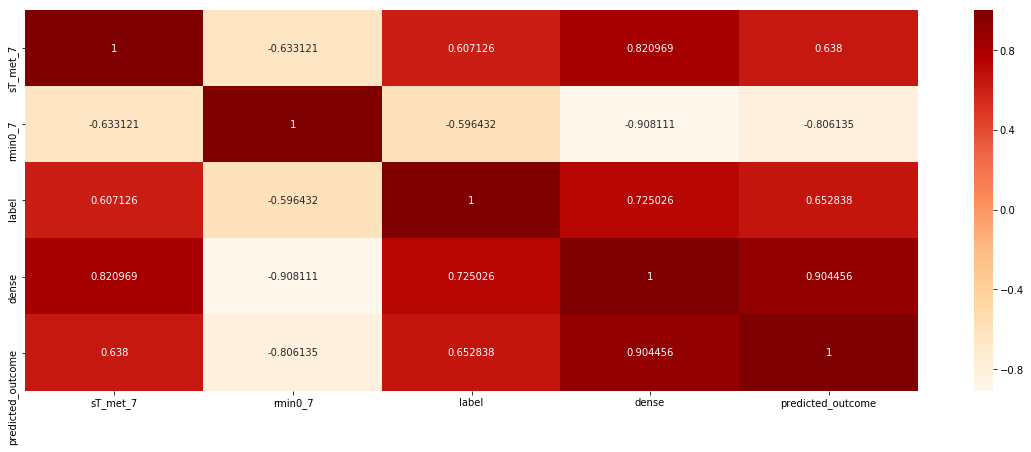

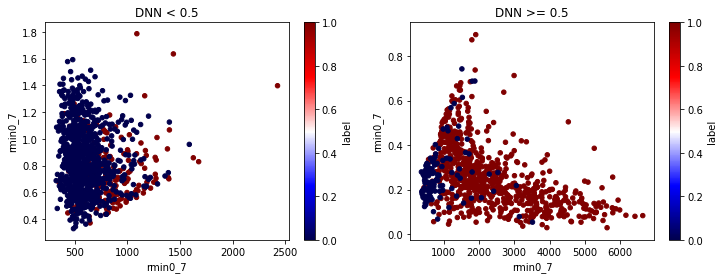

In [46]:
from matplotlib import cm



bkg_predict = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12,4))
n = len(VARS)-1 
print n*(n+1)/2
for i in range(len(VARS)):
    for j in range(i+1, len(VARS)):
        ax = plt.subplot(n*(n+1)/2, 2, 2*i+1)
        df_all.plot(kind='scatter', x=VARS[i], y=VARS[j], c='label', cmap = cm.seismic,ax=ax);
        ax.set_xlabel(VARS[i])
        ax.set_ylabel(VARS[j])
        ax.set_title('labeled'); 

        ax = plt.subplot(n*(n+1)/2, 2, 2*i+2)
        df_all.plot(kind='scatter', x=VARS[i], y=VARS[j], c='dense', cmap = cm.seismic,ax=ax);
        ax.set_xlabel(VARS[i])
        ax.set_ylabel(VARS[j])
        ax.set_title('predicted'); 


plt.show()  


correlations = df_all.corr()
plt.figure(figsize=(20,7))

sns.heatmap(correlations, annot=True, fmt='g', cmap = cm.OrRd,
            xticklabels=correlations.columns.values,
            yticklabels=correlations.columns.values)
plt.show()  



df_predicted_bkg = {}
df_predicted_sig = {}
df_predicted_bkg = df_all[df_all['dense'] <0.5]
df_predicted_sig = df_all[df_all['dense'] >=0.5]

#print df_predicted_bkg.iloc[:10]
#print df_predicted_sig.iloc[-10:]

fig, ax = plt.subplots(figsize=(12,4))
ax = plt.subplot(1, 2, 1)
df_predicted_bkg.plot(kind='scatter', x=VARS[0], y=VARS[1], c='label', cmap = cm.seismic,ax=ax);
ax.set_xlabel(VARS[i])
ax.set_ylabel(VARS[j])
ax.set_title('DNN < 0.5'); 


ax = plt.subplot(1, 2, 2)
df_predicted_sig.plot(kind='scatter', x=VARS[0], y=VARS[1], c='label', cmap = cm.seismic,ax=ax);
ax.set_xlabel(VARS[i])
ax.set_ylabel(VARS[j])
ax.set_title('DNN >= 0.5'); 
plt.show() 


In [34]:
# create a grid mesh to visualize performance for any point

gX, gY = np.meshgrid(np.linspace(-2, 5, 700), np.linspace(-2, 5, 700))
# print shape
print(gX.shape)

gZ = model.predict(np.c_[gX.ravel(), gY.ravel()])
gZ = gZ.reshape(gX.shape)

(700, 700)


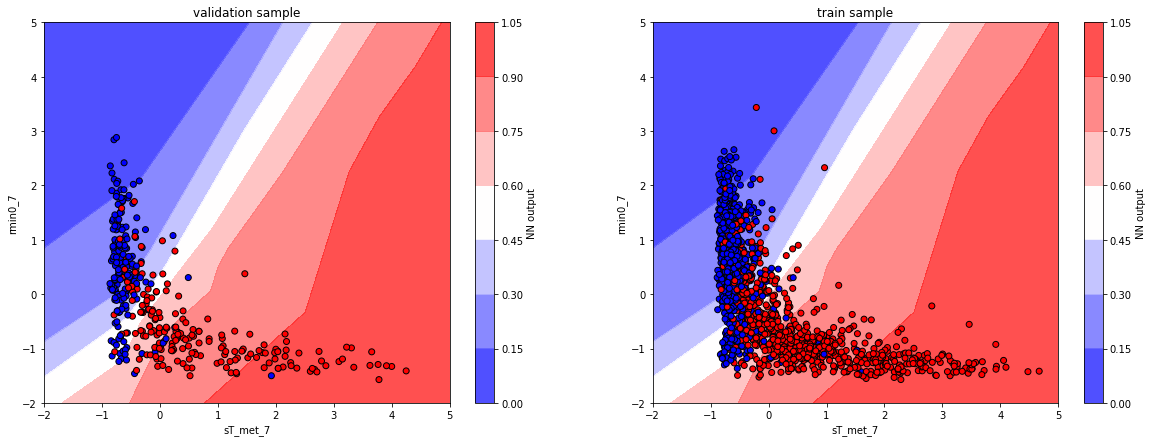

In [38]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,7))

ax = plt.subplot(1, 2, 1)
cm = plt.cm.bwr
cm_bright = ListedColormap(['#0000FF','#FF0000'])
cont_plot = ax.contourf(gX, gY, gZ, cmap=cm, alpha=.8)
ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test['label'], cmap=cm_bright, edgecolors='k')
ax.set_xlim(-2,5)
ax.set_ylim(-2,5)
ax.set_xlabel(VARS[0])
ax.set_ylabel(VARS[1])
ax.set_title('validation sample')

plt.colorbar(cont_plot,ax=ax, boundaries=[0,1],label='NN output')

ax = plt.subplot(1, 2, 2)
cm = plt.cm.bwr
cm_bright = ListedColormap(['#0000FF','#FF0000'])
cont_plot = ax.contourf(gX, gY, gZ, cmap=cm, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train['label'], cmap=cm_bright, edgecolors='k')
ax.set_xlim(-2,5)
ax.set_ylim(-2,5)
ax.set_xlabel(VARS[0])
ax.set_ylabel(VARS[1])
ax.set_title('train sample')

plt.colorbar(cont_plot,ax=ax, boundaries=[0,1],label='NN output')



# plot decision boundary
# overlaid with test data points